In [13]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore',category=np.VisibleDeprecationWarning)

## Part 1: Empirical distribution for rolling a die ##

In [2]:
# Set up rolling a die
die = Table().with_columns('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


In [3]:
# Get a random sample from this
die.sample(10)

Face
1
1
4
2
6
6
5
6
1
1


In [ ]:
# Draw a histogram
die.hist()

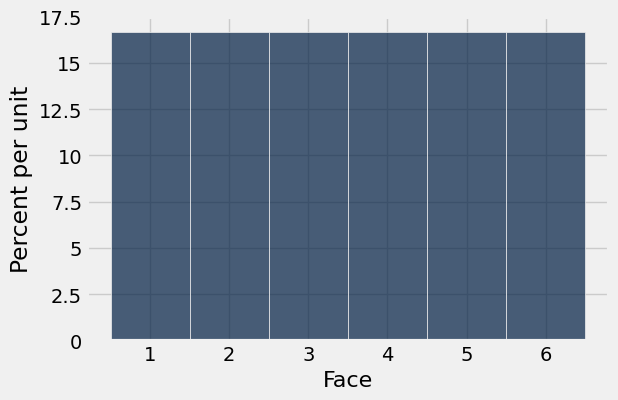

In [4]:
# Ugh that's not very pretty; let's be careful about the bins
roll_bins = np.arange(0.5, 6.6, 1)
die.hist(bins=roll_bins)

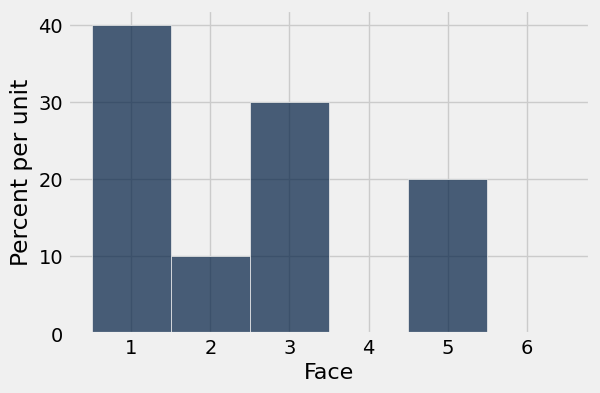

In [5]:
# Now let's see what happens if we introduce randomness into this:

die.sample(10).hist(bins=roll_bins)

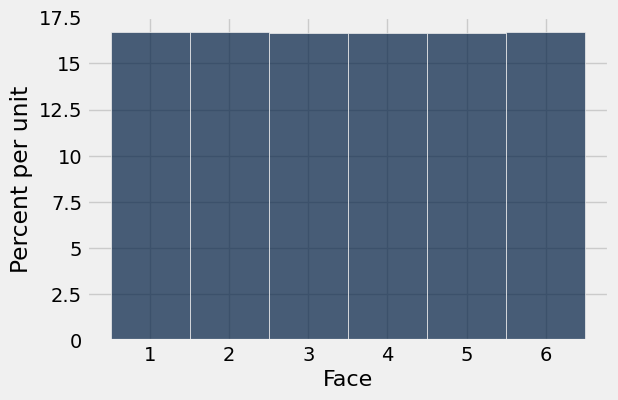

In [11]:
# Let's take a bigger sample:

die.sample(1000000).hist(bins=roll_bins)

In [ ]:
# Let's do an even bigger one:

die.sample(10000).hist(bins=roll_bins)

## Part 2: Back to the flight data ##

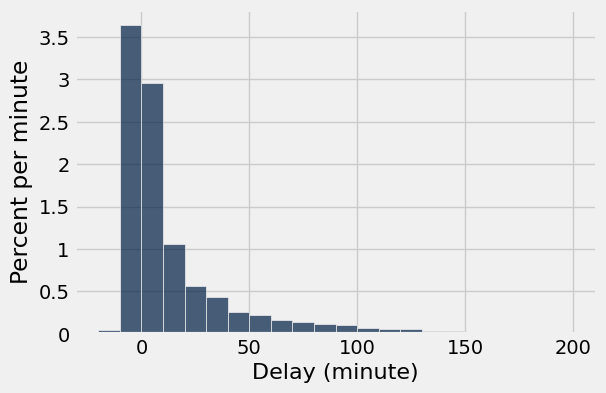

In [15]:
united = Table.read_table('united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united
united.hist('Delay', bins = np.arange(-20, 201, 10), unit = 'minute')

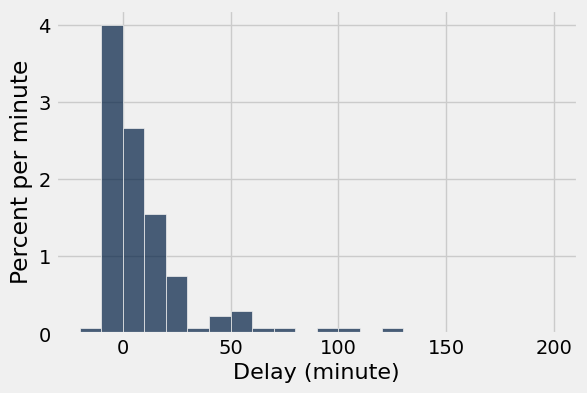

In [16]:
# A random sample: unpack what this code does!
start = np.random.choice(np.arange(100))
systematic_sample = united.take(np.arange(start, united.num_rows, 100))
#systematic_sample
systematic_sample.hist('Delay', bins = np.arange(-20, 201, 10), unit = 'minute')

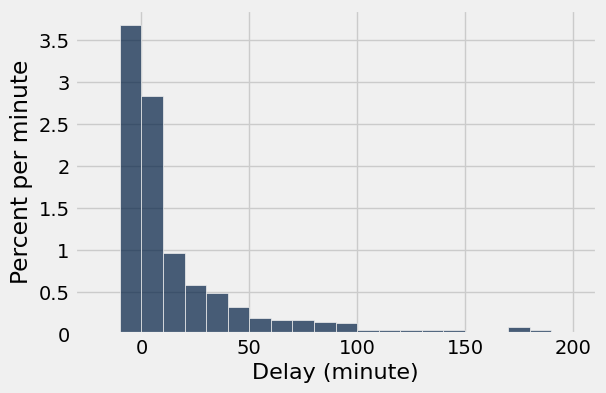

In [17]:
# Now a different random sample: choose 500 flights at random
sample_size = 500
united.sample(sample_size).hist('Delay', bins = np.arange(-20, 201, 10), unit = 'minute')

In [24]:
# Now introduce a STATISTIC
sample_size = 100
delay = np.average(united.column('Delay'))

sample = united.sample(sample_size)
sample_delay = np.average(sample.column('Delay'))

print('Average delay', delay)
print('Sample average', sample_delay)

Average delay 16.6581555154
Sample average 17.51


In [25]:
# Let's generate a bunch of sample averages instead:

def random_sample_average():
    return np.average(united.sample(100).column('Delay'))

sample_averages = make_array()

for _ in np.arange(1000):
    sample_averages = np.append(sample_averages, random_sample_average())

In [26]:
# Now make a table of the data!
sample_average_table = Table().with_columns('Sample average', sample_averages)
sample_average_table

Sample average
13.08
19.9
12.76
13.77
10.35
9.96
17.81
14.76
18.38
19.02


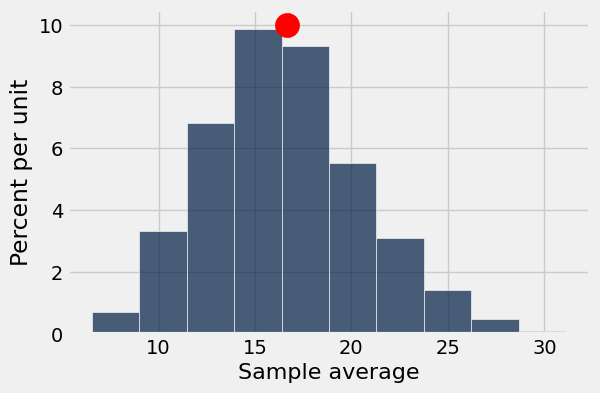

In [27]:
# Now let's look at the distribution of the sample averages

sample_average_table.hist()
plots.scatter(delay, 0.10, color='red', s=300)